In [2]:
from google.colab import drive
drive.mount('/content/d')

Mounted at /content/d


In [3]:
import pandas as pd 
import numpy as np 


In [4]:
df=pd.read_csv('/content/d/MyDrive/Kaggle_competitons_try/spotify_new/data.csv')
# df_train=pd.read_csv('/content/train.csv.zip')
# df_test=pd.read_csv('/content/test.csv.zip')


In [5]:
df.head(2)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936


In [6]:
df.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [7]:
nums=['valence','acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo']

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import random
import string

from matplotlib.pyplot import xticks
%matplotlib inline



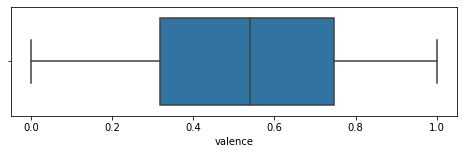

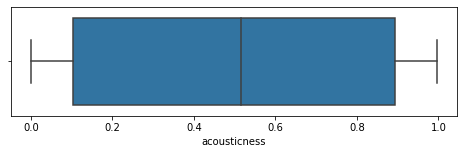

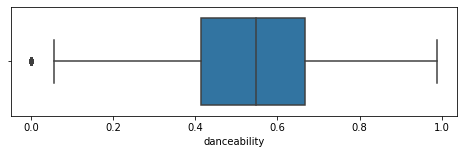

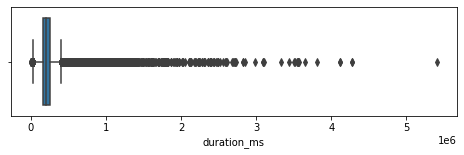

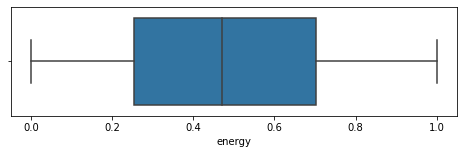

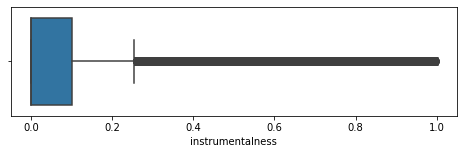

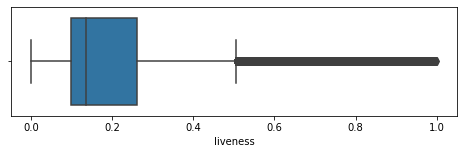

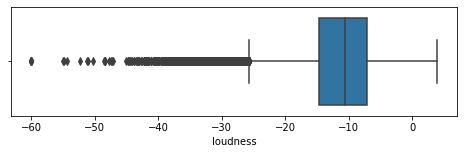

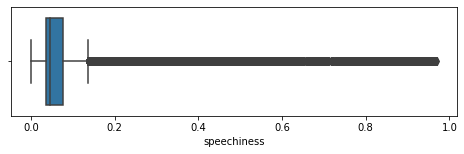

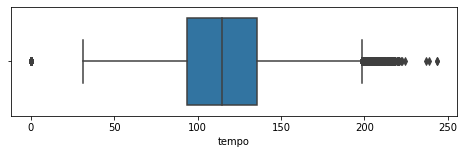

In [9]:
for n in nums: 
    
    plt.subplots(1,1, figsize = (8,2)) 
    sns.boxplot(x = n, data = df)
plt.show()

In [10]:

nums2=['duration_ms','instrumentalness','liveness','loudness','speechiness','tempo']

In [11]:
for p in nums2: 
    percentiles = df[p].quantile([0.10,0.85]).values
    df[p][df[p] <= percentiles[0]] = percentiles[0]
    df[p][df[p] >= percentiles[1]] = percentiles[1]

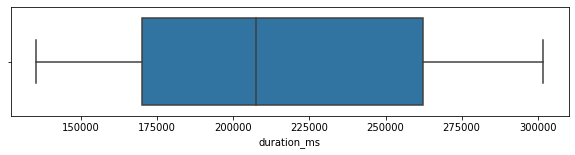

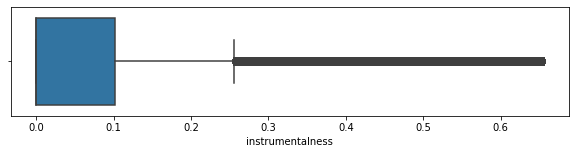

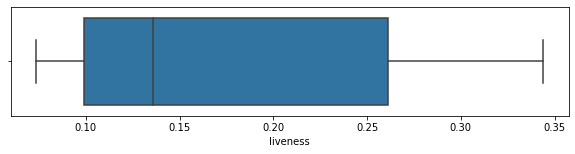

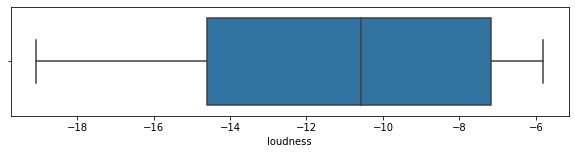

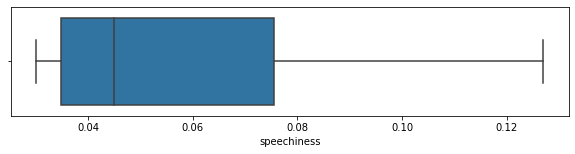

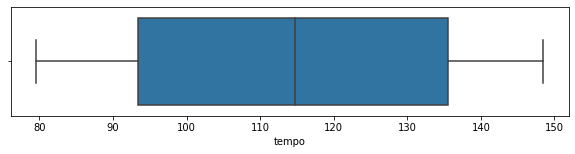

In [12]:
for t in nums2: 
 
    plt.subplots(1,1, figsize = (10,2)) 
    sns.boxplot(x = t, data = df)
plt.show()



In [13]:
df.drop(columns='instrumentalness',inplace=True)

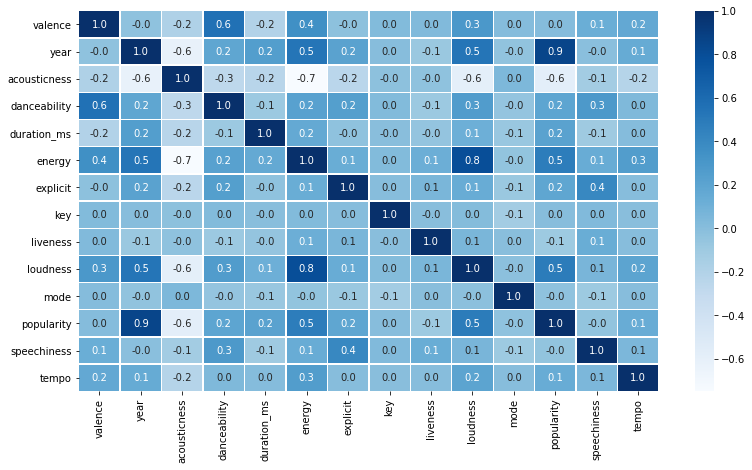

In [14]:
plt.subplots(figsize=(13, 7))
sns.heatmap(df.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',cmap="Blues")
plt.show() 

In [15]:
df_modeling=df.copy()

In [16]:
df_modeling.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'key', 'liveness',
       'loudness', 'mode', 'name', 'popularity', 'release_date', 'speechiness',
       'tempo'],
      dtype='object')

In [17]:
df_modeling.drop(columns=['artists','id','name'],inplace=True)

In [18]:
df_modeling.columns

Index(['valence', 'year', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'explicit', 'key', 'liveness', 'loudness', 'mode',
       'popularity', 'release_date', 'speechiness', 'tempo'],
      dtype='object')

In [19]:
df_modeling.head(2)

,valence,year,acousticness,danceability,duration_ms,energy,explicit,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,0.279,301827,0.211,0,10,0.344,-19.076,1,4,1921,0.0366,80.954
1,0.9630,1921,0.732,0.819,180533,0.341,0,7,0.160,-12.441,1,5,1921,0.1270,79.543


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaly = StandardScaler()

df_modeling[['valence',  'acousticness', 'danceability', 'duration_ms',
       'energy',  'key', 'liveness', 'loudness', 
         'speechiness', 'tempo','popularity']] =scaly.fit_transform(df_modeling[['valence',  'acousticness', 'danceability', 'duration_ms',
       'energy',  'key', 'liveness', 'loudness', 
         'speechiness', 'tempo','popularity']] )

In [22]:
y=df_modeling[['popularity']]
X=df_modeling[['valence',  'acousticness', 'danceability', 'duration_ms',
       'energy',  'key', 'liveness', 'loudness', 
         'speechiness', 'tempo']]

In [23]:
X.head(), y.head()

(    valence  acousticness  danceability  ...  loudness  speechiness     tempo
 0 -1.782825      1.276187     -1.467013  ... -1.763911    -0.703386 -1.412816
 1  1.650688      0.611347      1.598779  ... -0.268737     1.957928 -1.472275
 2 -1.858821      1.220340     -1.188820  ... -0.811597    -0.782872 -0.174543
 3 -1.381564      1.236296     -1.489722  ...  0.435471    -0.738713 -0.605631
 4 -1.047180      1.209703     -0.677855  ...  0.259701    -0.662171 -0.540062
 
 [5 rows x 10 columns],    popularity
 0   -1.256808
 1   -1.210993
 2   -1.210993
 3   -1.302624
 4   -1.348440)

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor



In [25]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import VotingRegressor

# r1 = LinearRegression()
# r2 = RandomForestRegressor(n_estimators=10, random_state=1)


# er = VotingRegressor([('lr', r1), ('rf', r2)])

In [26]:
from sklearn.feature_selection import RFE
RF_regressor_model=RandomForestRegressor()
rfe = RFE(RF_regressor_model
, 10)   

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [28]:
rfe = rfe.fit(X_train, y_train)

In [29]:
accepted_features = X_train.columns[rfe.support_]  #accepted features 
accepted_features

Index(['valence', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'key', 'liveness', 'loudness', 'speechiness', 'tempo'],
      dtype='object')

In [30]:
rejected_features = X_train.columns[~rfe.support_]  #rejected features 
rejected_features

Index([], dtype='object')

In [31]:
rfe.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [32]:
RF_regressor_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [33]:
RF_regressor_model.score(X_train,y_train)

0.9381705123833727

In [34]:
y_pred=RF_regressor_model.predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_pred)

#trying to better the model with grid search CV 

0.42252115255008643

In [36]:
param_grid = [{'n_estimators': [3, 10, 30],
         'max_features': [2,4,6,8]},
         ]

forest_reg=RandomForestRegressor()

grid_search= GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [48]:
grid_search.best_params_ , grid_search.best_estimator_

({'max_features': 4, 'n_estimators': 30},
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features=4, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=30, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False))

In [50]:
feature_imp=grid_search.best_estimator_.feature_importances_ 

In [51]:
for k,v in zip(X_train.columns,feature_imp):
  print(k,v)

valence 0.07544191571475328
acousticness 0.30208110039202946
danceability 0.07479818476826473
duration_ms 0.08304589570273507
energy 0.1391878472392579
key 0.027686623495482503
liveness 0.04862530808091859
loudness 0.13441546739505264
speechiness 0.07046463471881838
tempo 0.04425302249268747


In [52]:
final_model=grid_search.best_estimator_

In [53]:
y_pred_final=final_model.predict(X_test)

In [57]:
m=mean_squared_error(y_test,y_pred_final)
rmse=np.sqrt(m)
rmse

0.6530651660388134

In [62]:
y_pred_final=np.array(y_pred_final)

In [65]:
y_test=np.array(y_test)

In [2]:
res=y_pred_final-y_test

NameError: ignored

In [1]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

NameError: ignored